In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

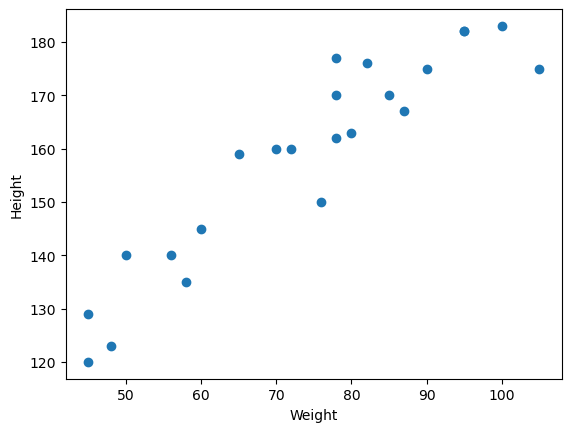

In [5]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
#Divide dataset into independenet and dependenet feature
X = df[['Weight']]
y = df['Height']

In [7]:
#train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [9]:
X.shape

(23, 1)

In [10]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [11]:
y_train.shape,y_test.shape

((18,), (5,))

In [12]:
#standardize the data
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

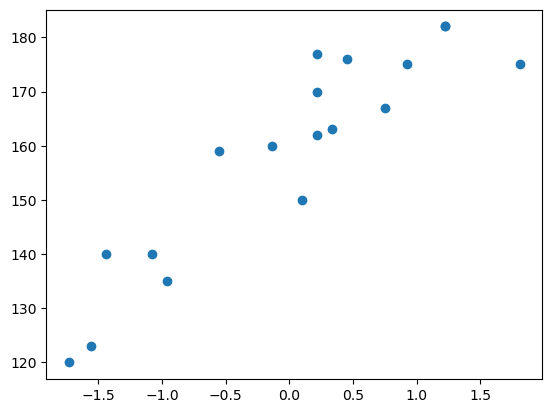

In [15]:
plt.scatter(X_train,y_train)

In [16]:
#Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train , y_train)

LinearRegression()

In [19]:
#Slope or coefficient of weight
regressor.coef_

array([17.4980314])

In [20]:
#Intercept
regressor.intercept_

158.66666666666666

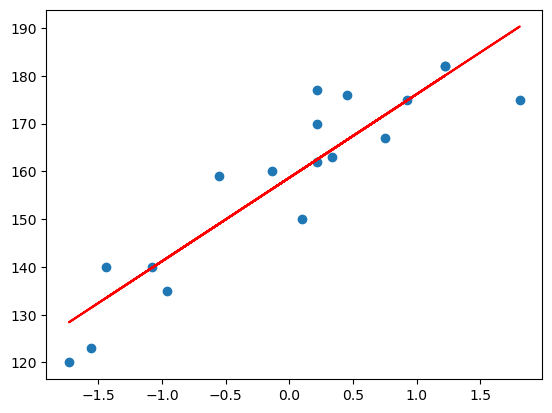

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train , regressor.predict(X_train),'r') #Best fit line

In [22]:
y_pred_test = regressor.predict(X_test)

In [23]:
y_pred_test,y_test

(array([185.15153272, 154.19519578, 169.67336425, 143.8764168 ,
        128.39824833]),
 13    183
 4     160
 14    170
 3     145
 20    129
 Name: Height, dtype: int64)

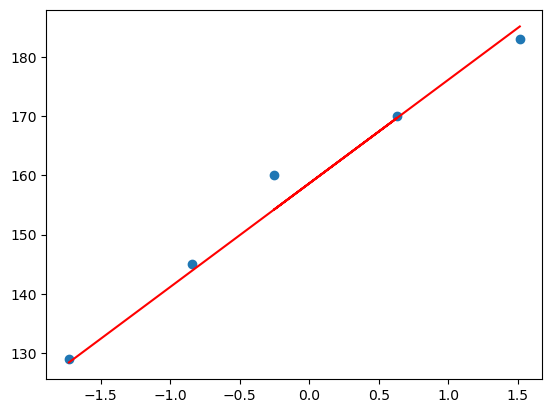

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [25]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [27]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8.011216064361035
2.0016615146831556
2.8304091690709727


In [31]:
#R squared
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [32]:
score

0.977511744710417

In [34]:
#Aadjusted R squared
1-(1-score)*(len(y_test-1)/len(y_test)-X_test.shape[1]-1)

1.0224882552895829

In [35]:
weight = scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
weight[0]

array([0.33416948])

In [37]:
regressor.predict([weight[0]])

array([164.51397476])

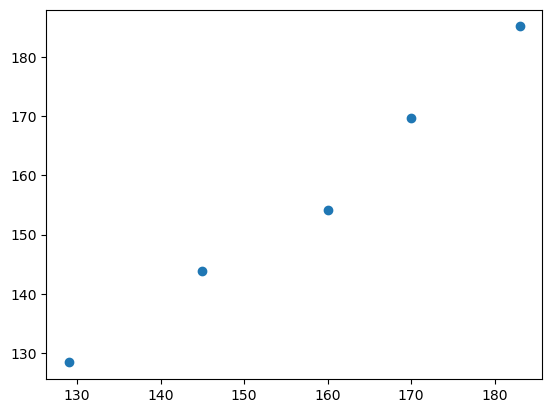

In [39]:
#Assumptions
#1.If we get a linear distribution , then it is good.
plt.scatter(y_test,y_pred_test)

In [54]:
#2. Normal distribution is good
residuals = y_test-y_pred_test

In [55]:
residuals

13   -2.151533
4     5.804804
14    0.326636
3     1.123583
20    0.601752
Name: Height, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Density'>

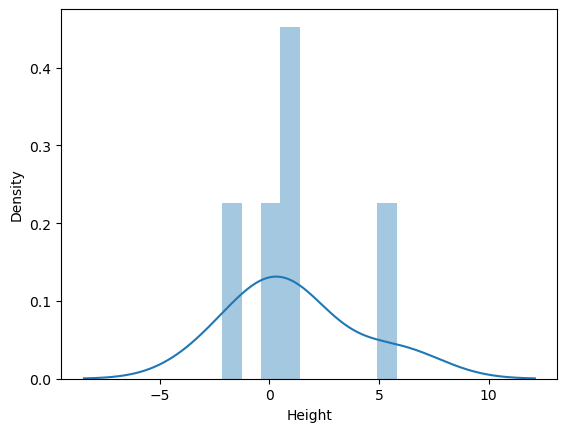

In [56]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(residuals,kde = True)

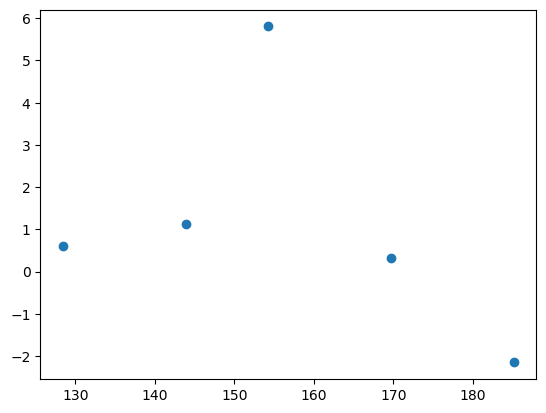

In [59]:
#Uniform distribution
plt.scatter(y_pred_test,residuals)